In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import scipy as sp
import netCDF4 as nc
from netCDF4 import Dataset
import h5py
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy
import iris
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from eofs.standard import Eof

C:\Users\hoonc\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hoonc\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\hoonc\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
def get_anom(startyear, endyear, plevel, contour_levels):
    #global minLat # Sea-level Pressure anaomaly
    
    cenLon = -100
    minLat = 20
    maxLat = 90
    
    # Define parameters
    file_clim = Dataset('1000hpa.nc', "r")
    sy = startyear-1871
    sm = sy*12
    ey = endyear-1871
    em = ey*12
    lon = np.squeeze(file_clim.variables['lon'][:])
    lat = np.squeeze(file_clim.variables['lat'][0:36])
    time = np.squeeze(file_clim.variables['time'][:])
    hgt  = np.squeeze(file_clim.variables['hgt'][:])
    level = np.squeeze(file_clim.variables['level'][:])
    plev = np.where(level == plevel)[0]
    print("Parameters defined")
    
    # Plotting
    for t in range(sm, em):
        
        var_clim = np.squeeze(file_clim.variables['hgt'][t,plev,0:36,:])
    
        # mean
        var = np.squeeze(np.mean(file_clim.variables['hgt'][t,plev,0:36,:]))
    
        # Anomaly
        var_anom_t = var - var_clim
        #coslat = np.cos(np.deg2rad(lat)).clip(0.,1.)
        #wgts = np.sqrt(coslat)[..., np.newaxis]
        #solver1 = Eof(var_anom_t, weights = wgts)
        #eof1 = solver1.eofsAsCovariance(neofs=1)
        
        # Define colourmap
        jet = cm.get_cmap('bwr', 100)
        jet = jet(np.arange(100))
        white = np.array([1.,1.,1.,1])
        jet[45:56,:] = white
        new_cmap = ListedColormap(jet)
        
        # figure
        fig, ax = plt.subplots(1,1)
        
        # Generating map
        ax = plt.axes(projection = ccrs.NorthPolarStereo(central_longitude = cenLon))
        ax.set_extent([-180, 180, 20, 90], ccrs.PlateCarree())
        gl = ax.gridlines()
        gl.xlocator = mticker.FixedLocator([cenLon-180, cenLon-90, cenLon, cenLon+90, cenLon+180])
        ax.coastlines(resolution = "110m")
        
        # Shading
        image = ax.contourf(lon, lat, var_anom_t, contour_levels, cmap = new_cmap, 
                            transform = ccrs.PlateCarree(), extend = 'both')
        
        # circle outline
        theta = np.linspace(0, 2*np.pi, 144)
        center = [0.5, 0.5]
        radius = 0.5
        points = np.array([np.cos(theta), np.sin(theta)]).T
        print(np.shape(points))
        circle = mpath.Path(points * radius + center)
        ax.set_boundary(circle, transform = ax.transAxes)
        
        # save figure
        plt.savefig('C:/Users/hoonc/Desktop/figure_t.png')
        
    return(print("job done"))

Parameters defined
(144, 2)
(144, 2)
(144, 2)
(144, 2)
(144, 2)
(144, 2)
(144, 2)
(144, 2)
(144, 2)
(144, 2)
(144, 2)
(144, 2)
job done


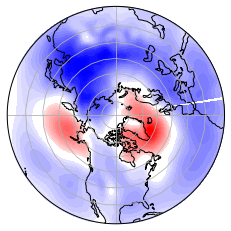

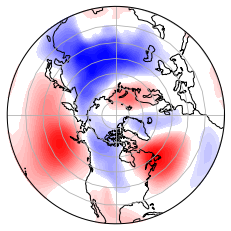

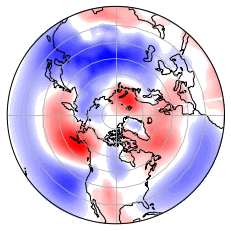

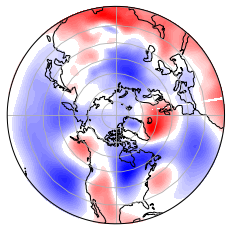

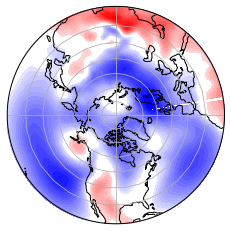

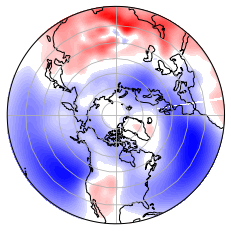

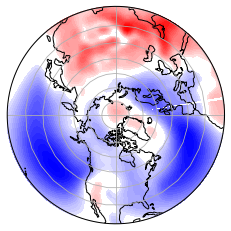

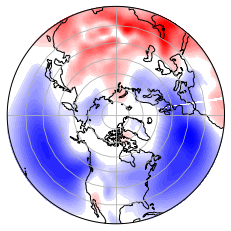

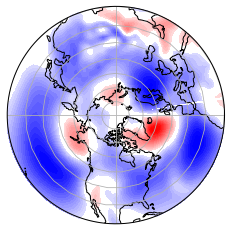

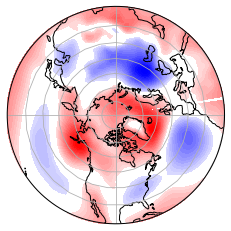

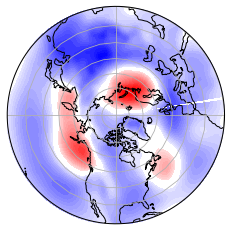

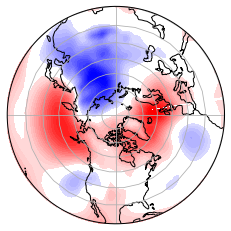

In [5]:
# test
get_anom(1901, 1902, 1000, 50)

In [ ]:
# Sea ice concentration
def mon_sic(month):
        
    #Define variables
    input = Dataset('C:/Users/hoonc/Desktop/1901.nc', "r")
    lon = np.squeeze(input.variables['longitude'][:])
    lat = np.squeeze(input.variables['latitude'][:])
    sic = np.squeeze(input.variables['siconc'][:])
    time = np.squeeze(input.variables['time'][:])
    mon = month
    acm = (month-1)*8
    sic_m = np.squeeze(input.variables['siconc'][(0+acm):(8+acm),:,:]) 
    sic_mm = sic_m.mean(axis=0)
    
    return (lon, lat, sic_mm, mon)

In [ ]:
mon_sic(1)

In [ ]:
def plot_sic(month, contour_levels):
    
    lon, lat, sic_mm, mon = mon_sic(month)
    
    # Define Colormap
    jet = cm.get_cmap('bwr', 100)
    jet = jet(np.arange(100))
    white = np.array([1.,1.,1.,1])
    jet[45:56,:] = white
    new_cmap = ListedColormap(bwr)
    
    fig, ax = plt.subplots(1,1)
    
    #generating map
    ax = plt.axes(projection = ccrs.NorthPolarStereo(central_longitude = cenLon))
    ax.set_extent([-180, 180, 15, 90], ccrs.PlateCarree())
    #gl = ax.gridlines()
    #gl.xlocator = mticker.FixedLocator([cenLon-180, cenLon-90, cenLon, cenLon+90, cenLon+180])
    #ax.coastlines(resolution = "110m")
    
    image = ax.contourf(lon, lat, sic_mm, contour_levels, cmap = new_cmap, 
                        transform = ccrs.PlateCarree(), extend = 'both')
    
    #caxes = fig.add_axes([0.85, 0.15, 0.015, 0.7])
    #cbar = plt.colorbar(image, orientation = 'vertical', ticks = contour_levels[::2],
    #                   drawedges = True, cax = caxes)
    #cbar.ax.tick_params(direction = 'in')
    #cbar.ax.set_xticklabels([int(x) for x in contour_levels[::2]])
    
    # Circle outline
    theta = np.linspace(0, 2*np.pi, 144)
    center = [0.5, 0.5]
    radius = 0.5
    points = np.array([np.cos(theta), np.sin(theta)]).T
    print(np.shape(points))
    circle = mpath.Path(points * radius + center)
    ax.set_boundary(circle, transform = ax.transAxes)
    
    #filename_figure = "SIC.png"
    plt.savefig('C:/Users/hoonc/Desktop/filename_figure.png')

In [ ]:
plot_sic(2, 50)